![Escudo Universidad Nacional](https://unal.edu.co/typo3conf/ext/unal_skin_default/Resources/Public/images/escudoUnal_black.png) 
# <center> Reconocimiento básico de gestos de la lengua de Señas Colombiana
#### <center> Universidad Nacional de Colombia
#### <center> Proyecto Técnicas de Inteligencia Artificial
>**Jose Ricardo Rincón Peláez**

>Felipe Rojas 

>Jefferson Domínguez

>Johan Rincón

---

### Resumen 
Aproximadamente el 7% de la población colombiana presenta discapacidades auditivas que afectan su calidad de vida, principalmente por la barrera que limita su comunicación por la falta de educación de la población general al no tener necesidad de aprender lengua de señas y dado que esta lengua generalmente es autóctona a cada país [Mapenzi]. Existen diferentes herramientas que buscan brindar un apoyo a esta población, sin embargo, es necesario implementar nuevas estrategias tecnológicas que permitan que la población general integre de manera eficaz a esta población marginada. 

Por lo anterior, el objetivo general de este proyecto es aplicar diversas estrategias de inteligencia artificial en un modelo que mediante el análisis de imágenes sea capaz de detectar diversos gestos pertenecientes a la lengua de señas colombiana con la finalidad de ser traducidos a otro lenguaje. Esto permitirá romper de cierto modo la brecha existente y servirá como un apoyo a esta población.

Para el desarrollo del proyecto, se propone una metodología que estará ligada con el avance del curso Técnicas de Inteligencia Artificial de la Universidad Nacional de Colombia, el cual aportará las herramientas necesarias para la implementación de una solución que permita cumplir los objetivos establecidos y el alcance del proyecto. En el siguiente documento se establecen los lineamientos, metodologías y bases necesarias para su adecuado desarrollo. 
### Justificación
- INSOR: La población sorda en el país es de 314.320 personas.
- El 50 % son adultos mayores.
- En Bogotá, solo el 50% de los niños entre 5-16 años de esta población están matriculados en un colegio.
- La lengua de señas es diferente para cada país.

### Objetivo
El proyecto comunicación inclusiva tiene como objetivo desarrollar un algoritmo capaz de reconocer gestos básicos realizados con las manos, pertenecientes a la lengua de señas. Estos gestos serán limitados al abecedario colombiano, LSC.
### Metodología
El siguiente diagrama muestra los pasos necesarios para la clasificación de imagenes. 

![alt text](diagrama.png "Etapas de un sistema de visión de máquina")

En primer lugar cargamos todas las librerias que requerimos para el desarrollo del proyecto. Es más sencillo si desde el inicio se sabe los requerimentos del sistema.

In [32]:
import cv2
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import glob
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import pickle
import joblib

## Carga del Dataset
La base de datos que se utilizo es propia y localizada en la carpeta TestDataU. Se identifico que para facilidad del proyecto, las señas de prueba deben tener un fondo claro. Del LSC, la J, Ñ y Z requieren movimiento entonces no se tuvieron en cuenta. Luego las imagenes se suben usando _cv2.imread_ y se puede especificar si subir a color o a balnco y negro entre otras limitaciones. Tambien se puede limitar el tamaño y rangos de frecuencia. 

In [2]:
A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []
I = []
J = []
K = []
L = []
M = []
N = []
O = []
P = []
Q = []
R = []
T = []
U = []
V = []
W = []
X = []
Y = []
for filename in glob.glob('TestDataSetU/A/*.JPG'): #lee todos los archivos jpg
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    A.append(im)
for filename in glob.glob('TestDataSetU/B/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    B.append(im)
for filename in glob.glob('TestDataSetU/C/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    C.append(im)
for filename in glob.glob('TestDataSetU/D/*.JPG'): 
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    D.append(im)
for filename in glob.glob('TestDataSetU/E/*.JPG'): 
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    E.append(im)
for filename in glob.glob('TestDataSetU/F/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    F.append(im)
for filename in glob.glob('TestDataSetU/G/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    G.append(im)
for filename in glob.glob('TestDataSetU/H/*.JPG'): 
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    H.append(im)
for filename in glob.glob('TestDataSetU/I/*.JPG'): 
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    I.append(im)
for filename in glob.glob('TestDataSetU/J/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    J.append(im)
for filename in glob.glob('TestDataSetU/K/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    K.append(im)
for filename in glob.glob('TestDataSetU/L/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    L.append(im)
for filename in glob.glob('TestDataSetU/M/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    M.append(im)
for filename in glob.glob('TestDataSetU/N/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    N.append(im)
for filename in glob.glob('TestDataSetU/O/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    O.append(im)
for filename in glob.glob('TestDataSetU/P/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    P.append(im)
for filename in glob.glob('TestDataSetU/Q/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    Q.append(im)
for filename in glob.glob('TestDataSetU/R/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    R.append(im)
for filename in glob.glob('TestDataSetU/T/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    T.append(im)
for filename in glob.glob('TestDataSetU/U/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    U.append(im)
for filename in glob.glob('TestDataSetU/V/*.JPG'): 
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    V.append(im)
for filename in glob.glob('TestDataSetU/W/*.JPG'): 
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    W.append(im)
for filename in glob.glob('TestDataSetU/X/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    X.append(im)
for filename in glob.glob('TestDataSetU/Y/*.JPG'):
    im = cv2.imread(filename,-1)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
    Y.append(im)
print('listo')

listo


Visualizamos los gestos que se van a probar.

1212


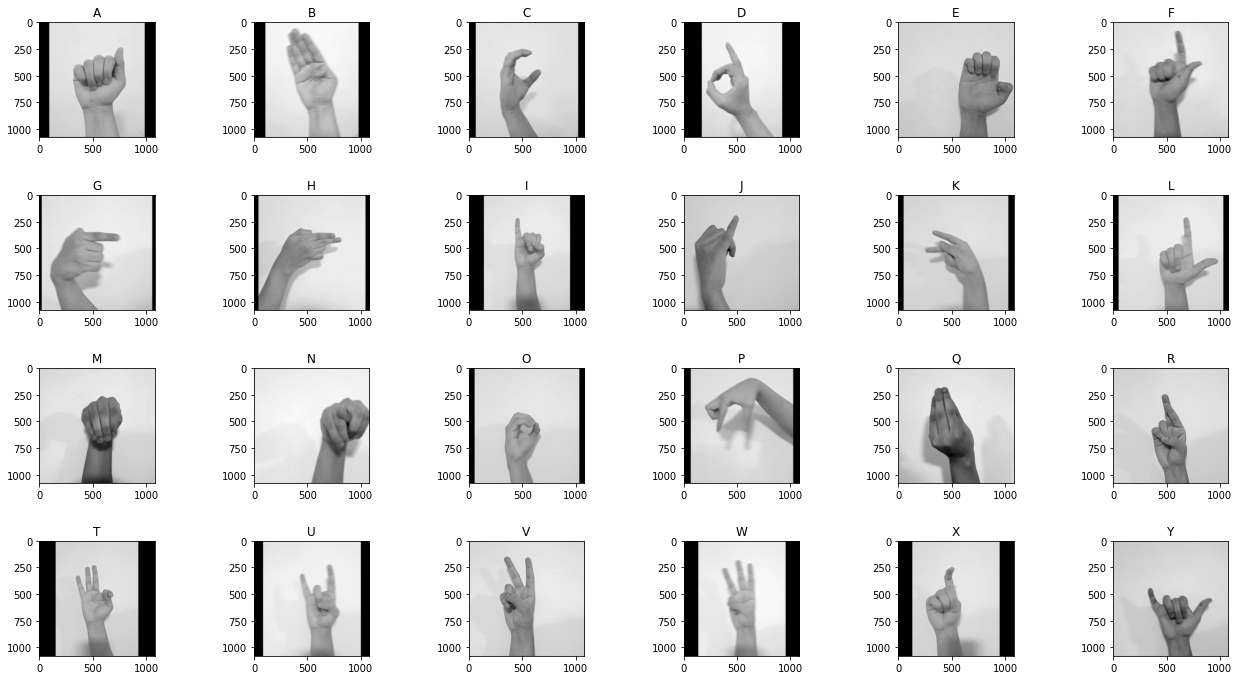

In [3]:
rne = 42 #para elegir algun set de señas al "azar"
imgPrueba_A = A[rne] 
imgPrueba_B = B[rne] 
imgPrueba_C = C[rne] 
imgPrueba_D = D[rne]
imgPrueba_E = E[rne] 
imgPrueba_F = F[rne] 
imgPrueba_G = G[rne] 
imgPrueba_H = H[rne]
imgPrueba_I = I[rne] 
imgPrueba_J = J[rne] 
imgPrueba_K = K[rne]
imgPrueba_L = L[rne] 
imgPrueba_M = M[rne] 
imgPrueba_N = N[rne] 
imgPrueba_O = O[rne]
imgPrueba_P = P[rne] 
imgPrueba_Q = Q[rne] 
imgPrueba_R = R[rne] 
imgPrueba_T = T[rne]
imgPrueba_U = U[rne] 
imgPrueba_V = V[rne] 
imgPrueba_W = W[rne] 
imgPrueba_X = X[rne] 
imgPrueba_Y = Y[rne] 

plt.figure
plt.subplot(4,6,1), plt.imshow(imgPrueba_A, cmap ='gray'), plt.title('A')
plt.subplot(4,6,2), plt.imshow(imgPrueba_B, cmap ='gray'), plt.title('B')
plt.subplot(4,6,3), plt.imshow(imgPrueba_C, cmap ='gray'), plt.title('C')
plt.subplot(4,6,4), plt.imshow(imgPrueba_D, cmap ='gray'), plt.title('D')
plt.subplot(4,6,5), plt.imshow(imgPrueba_E, cmap ='gray'), plt.title('E')
plt.subplot(4,6,6), plt.imshow(imgPrueba_F, cmap ='gray'), plt.title('F')
plt.subplot(4,6,7), plt.imshow(imgPrueba_G, cmap ='gray'), plt.title('G')
plt.subplot(4,6,8), plt.imshow(imgPrueba_H, cmap ='gray'), plt.title('H')
plt.subplot(4,6,9), plt.imshow(imgPrueba_I, cmap ='gray'), plt.title('I')
plt.subplot(4,6,10), plt.imshow(imgPrueba_J, cmap ='gray'), plt.title('J')
plt.subplot(4,6,11), plt.imshow(imgPrueba_K, cmap ='gray'), plt.title('K')
plt.subplot(4,6,12), plt.imshow(imgPrueba_L, cmap ='gray'), plt.title('L')
plt.subplot(4,6,13), plt.imshow(imgPrueba_M, cmap ='gray'), plt.title('M')
plt.subplot(4,6,14), plt.imshow(imgPrueba_N, cmap ='gray'), plt.title('N')
plt.subplot(4,6,15), plt.imshow(imgPrueba_O, cmap ='gray'), plt.title('O')
plt.subplot(4,6,16), plt.imshow(imgPrueba_P, cmap ='gray'), plt.title('P')
plt.subplot(4,6,17), plt.imshow(imgPrueba_Q, cmap ='gray'), plt.title('Q')
plt.subplot(4,6,18), plt.imshow(imgPrueba_R, cmap ='gray'), plt.title('R')
plt.subplot(4,6,19), plt.imshow(imgPrueba_T, cmap ='gray'), plt.title('T')
plt.subplot(4,6,20), plt.imshow(imgPrueba_U, cmap ='gray'), plt.title('U')
plt.subplot(4,6,21), plt.imshow(imgPrueba_V, cmap ='gray'), plt.title('V')
plt.subplot(4,6,22), plt.imshow(imgPrueba_W, cmap ='gray'), plt.title('W')
plt.subplot(4,6,23), plt.imshow(imgPrueba_X, cmap ='gray'), plt.title('X')
plt.subplot(4,6,24), plt.imshow(imgPrueba_Y, cmap ='gray'), plt.title('Y')
plt.subplots_adjust(top=3.2, bottom=1, left=0.10, right=3, hspace=0.5, wspace=0.2)

senas = A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q+R+T+U+V+W+X+Y #guardamos todas las imagenes en un solo vector
print(len(senas))

## Pre-procesamiento y segmentación
El objetivo del preprocesamiento es hacer la imagen mas facil de analizar y eliminar detalles sin importancia. Por su parte la segmentación es el proceso de asignar una etiqueta a cada pixel de la imagen de forma que los pixeles con caracteristicas similares compartan etiqueta. En este caso la segmentación se probo con cv2.findContours y cv2.watershed, más el rendimiento es mejor cuando se trabaja con los valores de las imagenes y no con los de las etiquetas

24


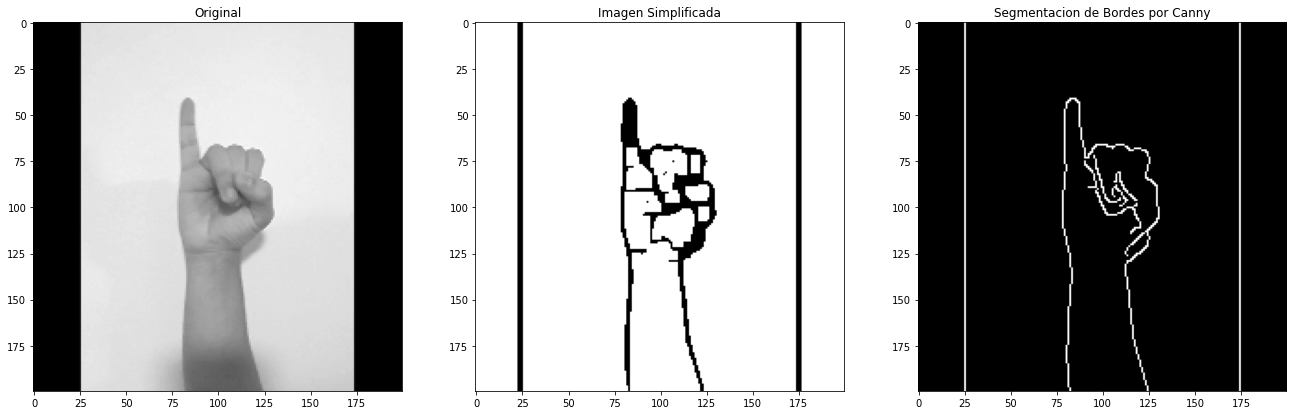

In [4]:
ima = imgPrueba_I
ima = cv2.resize(ima, (200,200)) #se normaliza el tamaño de las imagenes

# se utiliza filtro de Canny para determinar bordes y con ellos extraer luego el perimetro
gauss = cv2.GaussianBlur(ima , (3,3), 0) 
canny = cv2.Canny(gauss, 15, 150, apertureSize = 3)

# filtro morfologico simplifica la imagen y la binariza para una extracción de caracteristicas sencilla
img = cv2.adaptiveThreshold(gauss,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,5,2)
kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel, iterations = 1)

plt.figure
plt.subplot(1,3,1), plt.imshow(ima, cmap = 'gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(img, cmap = 'gray'), plt.title('Imagen Simplificada')
plt.subplot(1,3,3), plt.imshow(canny, cmap = 'gray'), plt.title('Segmentacion de Bordes por Canny')
plt.subplots_adjust(top=3.2, bottom=1, left=0.10, right=3, hspace=0.1, wspace=0.2)

momentos = cv2.moments(img) # la cantidad de momentos puede ser util para futuras caracteristicas
print(len(momentos))

## Estracción de caracteristicas
Una caracteristica es una medida que se realiza sobre un objeto o region (de los segmentados de la imagen) y que permite representar objetos o regiones en la imagen. Dichas caracteristicas forman vectores de n-dimensiones que se pueden reducir con las transformaciones lineales LDA y PCA. La diferencia entre estos es que PCA es un algoritmo de reducción de dimensiones no supervisado y LDA es supervisado.

Para este caso se probaron diferentes sets de caracteristicas (Momentos de Hu, Geometricas, Combinaciones) y los dos algoritmos de reducción. El mejor resultado es el siguiente.

In [5]:
caracteristicas = np.zeros((len(senas),5)) #creamos un vector donde guardar las caracteristicas

for f in range(len(senas)):
    img = senas[f] #leemos imagen por imagen
    
    # Hacemos el pre-procesamiento de la imagen
    img = cv2.resize(img, (200,200))  
    img = cv2.GaussianBlur(img , (5,5), 0) 
    contorno = cv2.Canny(img, 50, 150)
    img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,5,2)
    kernel = np.ones((5,5),np.uint8)
    img = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel, iterations = 1)
    
    # Calculamos las caracteristicas de interes de la imagen. Se eligieron caracteristicas geometricas
    
    # 1 Calculo del area de la imágen
    alto, ancho = img.shape
    area = 0
    for i in range(0,alto):
        for j in range(0,ancho):
              area=area+img[i,j]/255        
    caracteristicas[f,0] = area

    #2 Calculo del perimetro
    alto, ancho = contorno.shape
    perimetro = 0
    for i in range(0,alto):
        for j in range(0,ancho):
              perimetro=perimetro+contorno[i,j]/255
    caracteristicas[f,1] = perimetro
    
    # 3 Relación area perimetro
    ap=area/perimetro
    caracteristicas[f,2] = ap
    
    # 4 Compacidad
    comp=(perimetro*perimetro)/area
    caracteristicas[f,3] = comp
    
    # 5 Redondez
    red=(4*3.1416*area)/(perimetro*perimetro)
    caracteristicas[f,4] = red

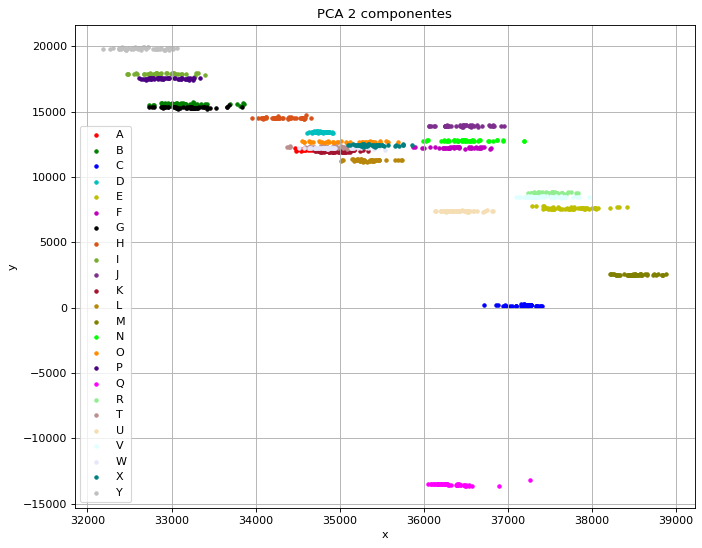

In [6]:
# Cada vector m1 correspondera a las caracteristicas de cada seña (cada categoria de clasificacion)
m1=caracteristicas[0:len(A),:]
m2=caracteristicas[len(A):len(A+B),:]
m3=caracteristicas[len(A+B):len(A+B+C),:]
m4=caracteristicas[len(A+B+C):len(A+B+C+D),:]
m5=caracteristicas[len(A+B+C+D):len(A+B+C+D+E),:]
m6=caracteristicas[len(A+B+C+D+E):len(A+B+C+D+E+F),:]
m7=caracteristicas[len(A+B+C+D+E+F):len(A+B+C+D+E+F+G),:]
m8=caracteristicas[len(A+B+C+D+E+F+G):len(A+B+C+D+E+F+G+H),:]
m9=caracteristicas[len(A+B+C+D+E+F+G+H):len(A+B+C+D+E+F+G+H+I),:]
m10=caracteristicas[len(A+B+C+D+E+F+G+H+I):len(A+B+C+D+E+F+G+H+I+J),:]
m11=caracteristicas[len(A+B+C+D+E+F+G+H+I+J):len(A+B+C+D+E+F+G+H+I+J+K),:]
m12=caracteristicas[len(A+B+C+D+E+F+G+H+I+J+K):len(A+B+C+D+E+F+G+H+I+J+K+L),:]
m13=caracteristicas[len(A+B+C+D+E+F+G+H+I+J+K+L):len(A+B+C+D+E+F+G+H+I+J+K+L+M),:]
m14=caracteristicas[len(A+B+C+D+E+F+G+H+I+J+K+L+M):len(A+B+C+D+E+F+G+H+I+J+K+L+M+N),:]
m15=caracteristicas[len(A+B+C+D+E+F+G+H+I+J+K+L+M+N):len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O),:]
m16=caracteristicas[len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O):len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P),:]
m17=caracteristicas[len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P):len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q),:]
m18=caracteristicas[len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q):len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q+R),:]
m19=caracteristicas[len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q+R):len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q+R+T),:]
m20=caracteristicas[len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q+R+T):len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q+R+T+U),:]
m21=caracteristicas[len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q+R+T+U):len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q+R+T+U+V),:]
m22=caracteristicas[len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q+R+T+U+V):len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q+R+T+U+V+W),:]
m23=caracteristicas[len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q+R+T+U+V+W):len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q+R+T+U+V+W+X),:]
m24=caracteristicas[len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q+R+T+U+V+W+X):len(A+B+C+D+E+F+G+H+I+J+K+L+M+N+O+P+Q+R+T+U+V+W+X+Y),:]

# Se hace el proceso de determinar PCA de cada una de las señas

mean1 = np.empty((0))
mean1, eigenvectors1, eigenvalues1 = cv2.PCACompute2(m1,mean1)

nm1 = np.ones((len(A),2))
a1 = eigenvectors1[0]
b1 = eigenvectors1[1]

for i in range(0,len(A)):
    nm1[i,0]=m1[i,:]@eigenvectors1[0]
    nm1[i,1]=m1[i,:]@eigenvectors1[1]

mean2 = np.empty((0))
mean2, eigenvectors2, eigenvalues2 = cv2.PCACompute2(m2,mean2)

nm2 = np.ones((len(B),2))
a2 = eigenvectors2[0]
b2 = eigenvectors2[1]

for i in range(0,len(B)):
    nm2[i,0]=m2[i,:]@eigenvectors2[0]
    nm2[i,1]=m2[i,:]@eigenvectors2[1]

mean3 = np.empty((0))
mean3, eigenvectors3, eigenvalues3= cv2.PCACompute2(m3,mean3)

nm3= np.ones((len(C),2))
a3= eigenvectors3[0]
b3= eigenvectors3[1]

for i in range(0,len(C)):
    nm3[i,0]=m3[i,:]@eigenvectors3[0]
    nm3[i,1]=m3[i,:]@eigenvectors3[1]
    
mean4 = np.empty((0))
mean4, eigenvectors4, eigenvalues4= cv2.PCACompute2(m4,mean4)

nm4= np.ones((len(D),2))
a4= eigenvectors4[0]
b4= eigenvectors4[1]

for i in range(0,len(D)):
    nm4[i,0]=m4[i,:]@eigenvectors4[0]
    nm4[i,1]=m4[i,:]@eigenvectors4[1]
    
mean5 = np.empty((0))
mean5, eigenvectors5, eigenvalues5= cv2.PCACompute2(m5,mean5)

nm5= np.ones((len(E),2))
a5= eigenvectors5[0]
b5= eigenvectors5[1]

for i in range(0,len(E)):
    nm5[i,0]=m5[i,:]@eigenvectors5[0]
    nm5[i,1]=m5[i,:]@eigenvectors5[1]

mean6 = np.empty((0))
mean6, eigenvectors6, eigenvalues6= cv2.PCACompute2(m6,mean6)

nm6= np.ones((len(F),2))
a6= eigenvectors6[0]
b6= eigenvectors6[1]

for i in range(0,len(F)):
    nm6[i,0]=m6[i,:]@eigenvectors6[0]
    nm6[i,1]=m6[i,:]@eigenvectors6[1]
    
mean7 = np.empty((0))
mean7, eigenvectors7, eigenvalues7= cv2.PCACompute2(m7,mean7)

nm7= np.ones((len(G),2))
a7= eigenvectors7[0]
b7= eigenvectors7[1]

for i in range(0,len(G)):
    nm7[i,0]=m7[i,:]@eigenvectors7[0]
    nm7[i,1]=m7[i,:]@eigenvectors7[1]

mean8 = np.empty((0))
mean8, eigenvectors8, eigenvalues8= cv2.PCACompute2(m8,mean8)

nm8= np.ones((len(H),2))
a8= eigenvectors8[0]
b8= eigenvectors8[1]

for i in range(0,len(H)):
    nm8[i,0]=m8[i,:]@eigenvectors8[0]
    nm8[i,1]=m8[i,:]@eigenvectors8[1]
    
mean9 = np.empty((0))
mean9, eigenvectors9, eigenvalues9= cv2.PCACompute2(m9,mean9)

nm9= np.ones((len(I),2))
a9= eigenvectors9[0]
b9= eigenvectors9[1]

for i in range(0,len(I)):
    nm9[i,0]=m9[i,:]@eigenvectors9[0]
    nm9[i,1]=m9[i,:]@eigenvectors9[1]

mean10 = np.empty((0))
mean10, eigenvectors10, eigenvalues10= cv2.PCACompute2(m10,mean10)

nm10= np.ones((len(J),2))
a10= eigenvectors10[0]
b10= eigenvectors10[1]

for i in range(0,len(J)):
    nm10[i,0]=m10[i,:]@eigenvectors10[0]
    nm10[i,1]=m10[i,:]@eigenvectors10[1]

mean11 = np.empty((0))
mean11, eigenvectors11, eigenvalues11= cv2.PCACompute2(m11,mean11)

nm11= np.ones((len(K),2))
a11= eigenvectors11[0]
b11= eigenvectors11[1]

for i in range(0,len(K)):
    nm11[i,0]=m11[i,:]@eigenvectors11[0]
    nm11[i,1]=m11[i,:]@eigenvectors11[1]
    
mean12 = np.empty((0))
mean12, eigenvectors12, eigenvalues12= cv2.PCACompute2(m12,mean12)

nm12= np.ones((len(L),2))
a12= eigenvectors12[0]
b12= eigenvectors12[1]

for i in range(0,len(L)):
    nm12[i,0]=m12[i,:]@eigenvectors12[0]
    nm12[i,1]=m12[i,:]@eigenvectors12[1]

mean13 = np.empty((0))
mean13, eigenvectors13, eigenvalues13= cv2.PCACompute2(m13,mean13)

nm13= np.ones((len(M),2))
a13= eigenvectors13[0]
b13= eigenvectors13[1]

for i in range(0,len(M)):
    nm13[i,0]=m13[i,:]@eigenvectors13[0]
    nm13[i,1]=m13[i,:]@eigenvectors13[1]
    
mean14 = np.empty((0))
mean14, eigenvectors14, eigenvalues14= cv2.PCACompute2(m14,mean14)

nm14= np.ones((len(N),2))
a14= eigenvectors14[0]
b14= eigenvectors14[1]

for i in range(0,len(N)):
    nm14[i,0]=m14[i,:]@eigenvectors14[0]
    nm14[i,1]=m14[i,:]@eigenvectors14[1]

mean15 = np.empty((0))
mean15, eigenvectors15, eigenvalues15= cv2.PCACompute2(m15,mean15)

nm15= np.ones((len(O),2))
a15= eigenvectors15[0]
b15= eigenvectors15[1]

for i in range(0,len(O)):
    nm15[i,0]=m15[i,:]@eigenvectors15[0]
    nm15[i,1]=m15[i,:]@eigenvectors15[1]
    
mean16 = np.empty((0))
mean16, eigenvectors16, eigenvalues16= cv2.PCACompute2(m16,mean16)

nm16= np.ones((len(P),2))
a16= eigenvectors16[0]
b16= eigenvectors16[1]

for i in range(0,len(P)):
    nm16[i,0]=m16[i,:]@eigenvectors16[0]
    nm16[i,1]=m16[i,:]@eigenvectors16[1]

mean17 = np.empty((0))
mean17, eigenvectors17, eigenvalues17= cv2.PCACompute2(m17,mean17)

nm17= np.ones((len(Q),2))
a17= eigenvectors17[0]
b17= eigenvectors17[1]

for i in range(0,len(Q)):
    nm17[i,0]=m17[i,:]@eigenvectors17[0]
    nm17[i,1]=m17[i,:]@eigenvectors17[1]
    
mean18 = np.empty((0))
mean18, eigenvectors18, eigenvalues18= cv2.PCACompute2(m18,mean18)

nm18= np.ones((len(R),2))
a18= eigenvectors18[0]
b18= eigenvectors18[1]

for i in range(0,len(R)):
    nm18[i,0]=m18[i,:]@eigenvectors18[0]
    nm18[i,1]=m18[i,:]@eigenvectors18[1]

mean19 = np.empty((0))
mean19, eigenvectors19, eigenvalues19= cv2.PCACompute2(m19,mean19)

nm19= np.ones((len(T),2))
a19= eigenvectors19[0]
b19= eigenvectors19[1]

for i in range(0,len(T)):
    nm19[i,0]=m19[i,:]@eigenvectors19[0]
    nm19[i,1]=m19[i,:]@eigenvectors19[1]
    
mean20 = np.empty((0))
mean20, eigenvectors20, eigenvalues20= cv2.PCACompute2(m20,mean20)

nm20= np.ones((len(U),2))
a20= eigenvectors20[0]
b20= eigenvectors20[1]

for i in range(0,len(U)):
    nm20[i,0]=m20[i,:]@eigenvectors20[0]
    nm20[i,1]=m20[i,:]@eigenvectors20[1]

mean21 = np.empty((0))
mean21, eigenvectors21, eigenvalues21= cv2.PCACompute2(m21,mean21)

nm21= np.ones((len(V),2))
a21= eigenvectors21[0]
b21= eigenvectors21[1]

for i in range(0,len(V)):
    nm21[i,0]=m21[i,:]@eigenvectors21[0]
    nm21[i,1]=m21[i,:]@eigenvectors21[1]
    
mean22 = np.empty((0))
mean22, eigenvectors22, eigenvalues22= cv2.PCACompute2(m22,mean22)

nm22= np.ones((len(W),2))
a22= eigenvectors22[0]
b22= eigenvectors22[1]

for i in range(0,len(W)):
    nm22[i,0]=m22[i,:]@eigenvectors22[0]
    nm22[i,1]=m22[i,:]@eigenvectors22[1]

mean23 = np.empty((0))
mean23, eigenvectors23, eigenvalues23= cv2.PCACompute2(m23,mean23)

nm23= np.ones((len(X),2))
a23= eigenvectors23[0]
b23= eigenvectors23[1]

for i in range(0,len(X)):
    nm23[i,0]=m23[i,:]@eigenvectors23[0]
    nm23[i,1]=m23[i,:]@eigenvectors23[1]
    
mean24 = np.empty((0))
mean24, eigenvectors24, eigenvalues24= cv2.PCACompute2(m24,mean24)

nm24= np.ones((len(Y),2))
a24= eigenvectors24[0]
b24= eigenvectors24[1]

for i in range(0,len(Y)):
    nm24[i,0]=m24[i,:]@eigenvectors24[0]
    nm24[i,1]=m24[i,:]@eigenvectors24[1]


# Graficamos la PCA como un diagrama de dispersion con un color para cada una de las señas
plt.figure(figsize=(10, 8), dpi=80)
plt.grid()  
plt.scatter(nm1[:,0],nm1[:,1],marker='.',color='r')
plt.scatter(nm2[:,0],nm2[:,1],marker='.',color='g')
plt.scatter(nm3[:,0],nm3[:,1],marker='.',color='b')
plt.scatter(nm4[:,0],nm4[:,1],marker='.',color='c')
plt.scatter(nm5[:,0],nm5[:,1],marker='.',color='y')
plt.scatter(nm6[:,0],nm6[:,1],marker='.',color='m')
plt.scatter(nm7[:,0],nm7[:,1],marker='.',color='k')
plt.scatter(nm8[:,0],nm8[:,1],marker='.',color='#D95319')
plt.scatter(nm9[:,0],nm9[:,1],marker='.',color='#77AC30')
plt.scatter(nm10[:,0],nm10[:,1],marker='.',color='#7E2F8E')
plt.scatter(nm11[:,0],nm11[:,1],marker='.',color='#A2142F')
plt.scatter(nm12[:,0],nm12[:,1],marker='.',color='#B8860B')
plt.scatter(nm13[:,0],nm13[:,1],marker='.',color='#808000')
plt.scatter(nm14[:,0],nm14[:,1],marker='.',color='#00FF00')
plt.scatter(nm15[:,0],nm15[:,1],marker='.',color='#FF8C00')
plt.scatter(nm16[:,0],nm16[:,1],marker='.',color='#4B0082')
plt.scatter(nm17[:,0],nm17[:,1],marker='.',color='#FF00FF')
plt.scatter(nm18[:,0],nm18[:,1],marker='.',color='#90EE90')
plt.scatter(nm19[:,0],nm19[:,1],marker='.',color='#BC8F8F')
plt.scatter(nm20[:,0],nm20[:,1],marker='.',color='#F5DEB3')
plt.scatter(nm21[:,0],nm21[:,1],marker='.',color='#E0FFFF')
plt.scatter(nm22[:,0],nm22[:,1],marker='.',color='#E6E6FA')
plt.scatter(nm23[:,0],nm23[:,1],marker='.',color='#008080')
plt.scatter(nm24[:,0],nm24[:,1],marker='.',color='#C0C0C0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','T','U','V','W','X','Y'])
plt.title('PCA 2 componentes')
plt.show()

## Clasificador
Los clasificadores toman el grupo de caracteristicas encontradas y define "zonas" para cada etiqueta. Luego para un nuevo grupo de datos debe ser capaz de asignar el label correcto. Se probaron los clasificadores K-medias, K-vecinos, Bayesiano, SVM-Linear, SVM-RBF, SVM-Polynomial y redes neuronales. Para este DataSet el Bayesiano ofrece los mejores resultados.

Number of mislabeled points out of a total 485 points : 14


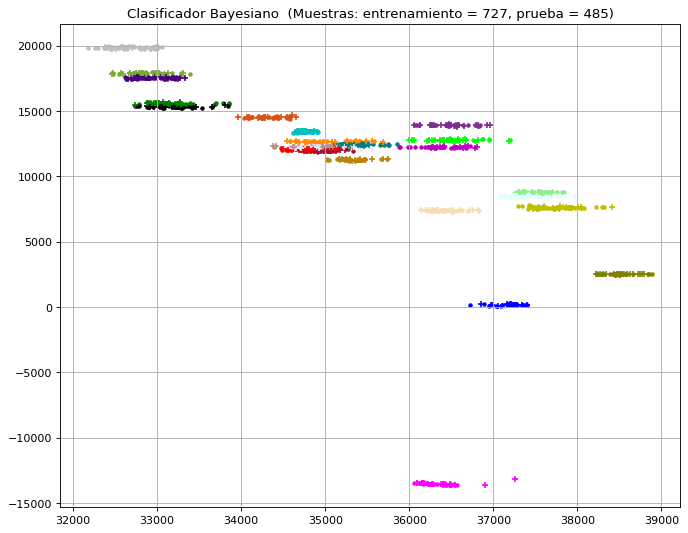

In [7]:
# Encademanos todos los vectores de caracteristicas
nm = np.concatenate((nm1,nm2,nm3,nm4,nm5,nm6,nm7,nm8,nm9,nm10,nm11,nm12,nm13,nm14,nm15,nm16,nm17,nm18,nm19,nm20,nm21,nm22,nm23,nm24),axis = 0)

# Creamos y encademanos todas las etiquetasde caracteristicas
y=np.concatenate((np.zeros(len(A)),np.ones(len(B)),2*np.ones(len(C)),3*np.ones(len(D)),4*np.ones(len(E)),5*np.ones(len(F)),6*np.ones(len(G)),7*np.ones(len(H)),8*np.ones(len(I)),9*np.ones(len(J)),10*np.ones(len(K)),11*np.ones(len(L)),12*np.ones(len(M)),13*np.ones(len(N)),14*np.ones(len(O)),15*np.ones(len(P)),16*np.ones(len(Q)),17*np.ones(len(R)),18*np.ones(len(T)),19*np.ones(len(U)),20*np.ones(len(V)),21*np.ones(len(W)),22*np.ones(len(X)),23*np.ones(len(Y))),axis=0)

Xx =nm # estas seran nuestros datos para el modelo
# los dividimos en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.4, random_state=0)

# Definimos el clasificador a usar
gnb = GaussianNB()

# Entremaos el modelo con .fit y lo probamos con .test
y_pred = gnb.fit(X_train, y_train).predict(X_test)
# Imprimimos el numero de resultados incorrectos del total
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))


# Graficamos los puntos seleccionados por el clasificador como + sobre los . de la PCA
plt.figure(figsize=(10, 8), dpi=80)
plt.grid()
for f in range(0, len(y_train)):
    if y_train[f]==0:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='r')
    elif y_train[f] == 1:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='g')
    elif y_train[f] == 2:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='b')
    elif y_train[f] == 3:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='c')
    elif y_train[f] == 4:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='y')
    elif y_train[f] == 5:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='m')
    elif y_train[f] == 6:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='k')
    elif y_train[f] == 7:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#D95319')
    elif y_train[f] == 8:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#77AC30')
    elif y_train[f] == 9:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#7E2F8E')
    elif y_train[f] == 10:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#A2142F')
    elif y_train[f] == 11:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#B8860B')
    elif y_train[f] == 12:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#808000')
    elif y_train[f] == 13:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#00FF00')
    elif y_train[f] == 14:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#FF8C00')
    elif y_train[f] == 15:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#4B0082')
    elif y_train[f] == 16:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#FF00FF')
    elif y_train[f] == 17:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#90EE90')
    elif y_train[f] == 18:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#BC8F8F')
    elif y_train[f] == 19:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#F5DEB3')
    elif y_train[f] == 20:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#E0FFFF')
    elif y_train[f] == 21:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#E6E6FA')
    elif y_train[f] == 22:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#008080')
    elif y_train[f] == 23:
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#C0C0C0')
    else :
        plt.scatter(X_train[f,0],X_train[f,1],marker='.',color='#262626')   

for f in range(0, len(y_pred)):
    if y_pred[f]==0:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='r')
    elif y_pred[f] == 1:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='g')
    elif y_pred[f] == 2:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='b')
    elif y_pred[f] == 3:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='c')
    elif y_pred[f] == 4:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='y')
    elif y_pred[f] == 5:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='m')
    elif y_pred[f] == 6:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='k')
    elif y_pred[f] == 7:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#D95319')
    elif y_pred[f] == 8:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#77AC30')
    elif y_pred[f] == 9:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#7E2F8E')
    elif y_pred[f] == 10:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#A2142F')
    elif y_pred[f] == 11:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#B8860B')
    elif y_pred[f] == 12:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#808000')
    elif y_pred[f] == 13:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#00FF00')
    elif y_pred[f] == 14:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#FF8C00')
    elif y_pred[f] == 15:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#4B0082')
    elif y_pred[f] == 16:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#FF00FF')
    elif y_pred[f] == 17:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#90EE90')
    elif y_pred[f] == 18:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#BC8F8F')
    elif y_pred[f] == 19:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#F5DEB3')
    elif y_pred[f] == 20:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#E0FFFF')
    elif y_pred[f] == 21:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#E6E6FA')
    elif y_pred[f] == 22:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#008080')
    elif y_pred[f] == 23:
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#C0C0C0')
    else :
        plt.scatter(X_test[f,0],X_test[f,1],marker='+',color='#262626')   
        
plt.title("Clasificador Bayesiano  (Muestras: entrenamiento = %i, prueba = %i)"
              % (len(y_train), len(y_pred)))
plt.show()


Para ver no solo los puntos probados sino las zonas a nivel general que separa el clasificador se tiene el siguiente codigo.

Number of mislabeled points out of a total 485 points : 14


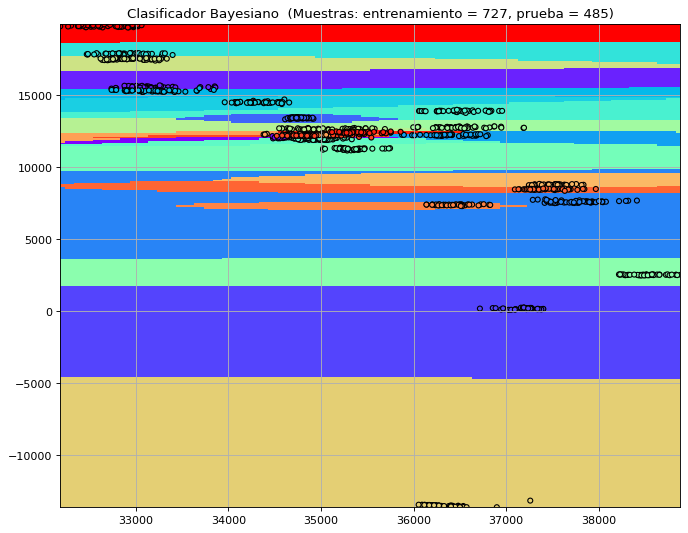

In [31]:
cmap_light = ListedColormap(['r', 'g', 'b','y','c','m','k', '#D95319','#77AC30', '#7E2F8E', '#A2142F','#262626','#D95319','#77AC30','#7E2F8E','#A2142F','#B8860B','#808000','#00FF00','#FF8C00','#4B0082','#FF00FF','#90EE90','#BC8F8F','#F5DEB3','#E0FFFF','#E6E6FA','#008080','#C0C0C0','#262626'])
h = 100

# we create an instance of Neighbours Classifier and fit the data.
gnb = GaussianNB()
#clf = SVC(kernel='poly', degree=3, gamma = 'auto' )
gnb.fit(Xx, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = Xx[:, 0].min() - 1, Xx[:, 0].max() + 1
y_min, y_max = Xx[:, 1].min() - 1, Xx[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
# Put the result into a color plot
plt.figure(figsize=(10, 8), dpi=80)
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='rainbow', shading ='auto')

# Plot also the training points
plt.scatter(Xx[:, 0], Xx[:, 1], c=y, cmap='rainbow', edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Clasificador Bayesiano  (Muestras: entrenamiento = %i, prueba = %i)"
              % (len(y_train), len(y_pred)))
plt.grid()
plt.show()

## Resultados
Por medio de las metricas ofrecidas por Sticky Learn, se evalua el modelo generado en terminos de precisión, exhaustividad, valor-F y exactitud.
Además se crea la matriz de confusión para ver cuales son las clases que más se confunden y con quien.

In [15]:
# Creamos las etiquetas de las clases
etiquetas = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','T','U','V','W','X','Y']
# La matriz de confusión indica estadisticas sobre el rendimiento del modelo
print("Reporte del clasificador: \n %s\n %s\n" 
      %(gnb, metrics.classification_report(y_test, y_pred, target_names=etiquetas)))
print("Matriz de confusión:\n%s" % metrics.confusion_matrix(y_test, y_pred))

gnb.score(X_test, y_test) # Calificación global del modelo diseñado

Reporte del clasificador: 
 GaussianNB()
               precision    recall  f1-score   support

           A       0.74      0.89      0.81        19
           B       1.00      0.95      0.98        21
           C       1.00      1.00      1.00        18
           D       1.00      1.00      1.00        20
           E       1.00      1.00      1.00        25
           F       1.00      1.00      1.00        16
           G       0.94      1.00      0.97        17
           H       1.00      1.00      1.00        18
           I       1.00      1.00      1.00        20
           J       1.00      1.00      1.00        24
           K       0.95      0.75      0.84        24
           L       1.00      1.00      1.00        16
           M       1.00      1.00      1.00        23
           N       1.00      1.00      1.00        26
           O       1.00      1.00      1.00        18
           P       1.00      1.00      1.00        18
           Q       1.00      1.00      

0.9711340206185567

Exportamos el modelo para probarlo en otros dataset y en una aplicación.

In [59]:
# save the model to disk
modelfilename = 'finalized_model.sav'
#pickle.dump(gnb, open(modelfilename, 'wb'))
joblib.dump(gnb, modelfilename)

['finalized_model.sav']